In [1]:
import requests as req      #Importing Library
import pandas as pd
from bs4 import BeautifulSoup

class Excel:

  def __init__(self, url, save_path):
    self.url = url
    self.save_path = save_path


  def download_data(self):      # Downloads json data from url
    res = req.get(self.url)
    return res.json()

  def process_data(self):       # Converts json data to dataframe
    data = self.download_data()
    df = pd.json_normalize(data["_embedded"]["episodes"])
    df.drop(columns=['airstamp', '_links.self.href', '_links.show.href'], inplace=True)
    df['airdate'] = pd.to_datetime(df['airdate'])
    df['airtime'] = pd.to_datetime(df['airtime']).dt.strftime('%I:%M:%p')
    df['runtime'] = df['runtime'].astype(float)
    return df


url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"     
save_path = "datafile.xlsx"  

ex = Excel(url, save_path)

df = ex.process_data()

In [2]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [3]:
df['summary'] = df['summary'].apply(remove_html_tags)     # Removing html tags from summary

In [4]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,summary,rating.average,image.medium,image.original
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00:PM,68.0,A woman named Dolores is a free spirit in the ...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00:PM,60.0,Bernard suspects that someone is sabotaging th...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00:PM,60.0,Bernard continues to investigate Dolores' supp...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00:PM,60.0,While Dolores joins William and Logan on their...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00:PM,60.0,Dolores takes the first step on her path of di...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              36 non-null     int64         
 1   url             36 non-null     object        
 2   name            36 non-null     object        
 3   season          36 non-null     int64         
 4   number          36 non-null     int64         
 5   type            36 non-null     object        
 6   airdate         36 non-null     datetime64[ns]
 7   airtime         36 non-null     object        
 8   runtime         36 non-null     float64       
 9   summary         36 non-null     object        
 10  rating.average  36 non-null     float64       
 11  image.medium    36 non-null     object        
 12  image.original  36 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 3.8+ KB


<Axes: xlabel='season'>

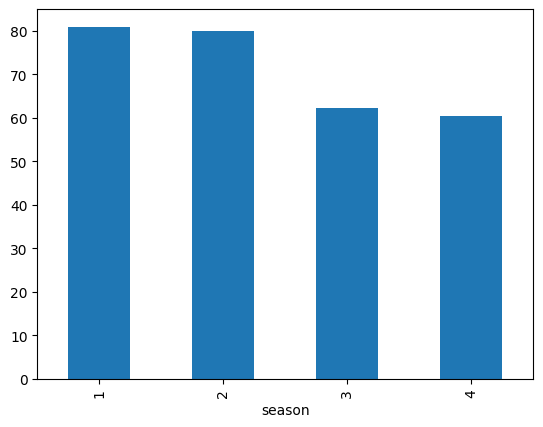

In [6]:
# Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
df.groupby('season')['rating.average'].sum().plot(kind='bar')

In [8]:
# Get all the episode names, whose average rating is more than 8 for every season
df[df['rating.average'] > 8]['name']

6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [9]:
# Get all the episode names that aired before May 2019
df[df['airdate'] < pd.Timestamp('2019-05-01')]['name']

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [16]:
# Get the episode name from each season with the highest and lowest rating

# highest_rating_episodes = df.groupby('season')['rating.average'].idxmax()
# highest_rating_df = df.loc[highest_rating_episodes, ['season', 'name', 'rating.average']]

# lowest_rating_episodes = df.groupby('season')['rating.average'].idxmin()
# lowest_rating_df = df.loc[lowest_rating_episodes, ['season', 'name', 'rating.average']]

# result_df = pd.concat([highest_rating_df, lowest_rating_df])

# result_df.set_index('season', inplace=True)
# result_df.plot(kind='bar', rot=0, width=0.4)

# plt.xlabel("Season")
# plt.ylabel("Rating")

# plt.show()


highest_rating_episodes = df.groupby('season')['rating.average'].idxmax()

df.loc[highest_rating_episodes, ['season', 'name', 'rating.average']]

,season,name,rating.average
9,1,The Bicameral Mind,8.7
17,2,Kiksuya,8.7
20,3,Parce Domine,8.0
32,4,Zhuangzi,7.8


In [17]:
lowest_rating_episodes = df.groupby('season')['rating.average'].idxmin()

df.loc[lowest_rating_episodes, ['season', 'name', 'rating.average']]

,season,name,rating.average
2,1,The Stray,7.6
14,2,Akane No Mai,7.6
25,3,Decoherence,7.5
28,4,The Auguries,7.1


In [18]:
# Get the summary for the most popular ( ratings ) episode in every season
most_popular_episodes = df.groupby('season')['rating.average'].idxmax()
df.loc[most_popular_episodes, ['season', 'name', 'summary']]


,season,name,summary
9,1,The Bicameral Mind,Delores finds out the truth about William's fa...
17,2,Kiksuya,Another of Westworld's Host revolutionaries is...
20,3,Parce Domine,"If you're stuck in a loop, try walking in a st..."
32,4,Zhuangzi,God is bored.
